In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import skimage
from skimage import io
import matplotlib as mp
import pylab as pl
%matplotlib inline
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
digits = mnist.data
target = mnist.target
digits.shape
target.shape
#digits[100]
#pl.imshow(digits[69989].reshape(28,28))


(70000,)

In [4]:
from sklearn import ensemble
classifier=ensemble.RandomForestClassifier()
classifier.fit(digits,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Populating the interactive namespace from numpy and matplotlib
(365, 450)
(182, 225)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


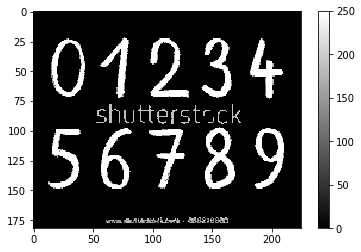

In [10]:
%pylab inline
image=io.imread('C:/Users/bnaveen3/Desktop/digits.jpg',as_gray='true')
print(image.shape)
from skimage.transform import rescale, resize, downscale_local_mean
oimage = rescale(image, 1.0 / 2)
print(oimage.shape)
oimage =oimage*250
idx = oimage[:,:]<100
idx_not =oimage[:,:]>200
oimage[idx_not]=0
oimage[idx]=250
pl.imshow(oimage,cmap='gray')
pl.colorbar()

182 225


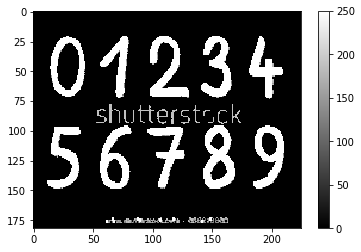

In [13]:
x,y=oimage.shape
cimage=oimage
print(x,y)
for i in range(x-1):
    for j in range(y-1):
        if oimage[i,j] >200:
            pass
            #darkening the already darkened area so that it will be easy to identify test block
            cimage[i,j-1] = oimage[i,j]
            cimage[i-1,j] = oimage[i,j]
            cimage[i-1,j-1] = oimage[i,j]
            cimage[i-2,j] = oimage[i,j]
            cimage[i-2,j-1] = oimage[i,j]
            cimage[i-2,j] = oimage[i,j]


pl.imshow(cimage,cmap='gray')
pl.colorbar()
  

In [9]:
closeflag='N'
i=1
while(closeflag !='Y' and i<4):
    m=96
    i =i+1
    for i in range(m,y-1):
        if i ==y-2:
            closeflag='Y'
        if sum(cimage[i]) > 0.9*y:
            rowid = i
            break
    for j in range(rowid,y-1):
        if sum(cimage[j]) < 0.9**y:
            rowidend = j
            m=rowidend+1
            break
    print('m',m)
    cropimage=cimage[rowid-2:rowidend+2,]

#print('x ',x)
print('rowidend ' ,rowidend)
cropimage=cimage[rowid-2:rowidend+2,]
a,b = cropimage.shape
#print('b',b)
#print('value',sum(cropimage[:,200]),'x',x)
pl.imshow(cropimage,cmap='gray')
pl.colorbar()
clength =rowidend-rowid
#print('clength',clength)
l=0
curidx =-1
q=0
t=0
final='naveen'
endvalue=0
exitflag ='N'
while (exitflag!='Y'):
    exitflag ='N'
    q=q+1
    #print('l',l)
    for i in range(l,b-1):
        if i == b-2:
            exitflag='Y'

        curidx = i
        #print('curidx',curidx)
        if sum(cropimage[:,i]) > clength*.85:
            cstart = i
            #print('cstart',cstart)
            break

    for i in range(cstart+1,b-1):
        if sum(cropimage[:,i]) < clength*.85:
            cend = i
            #print('cend',cend)
            l=cend+1
            break
    if exitflag !='Y':
        curimage=cropimage[1:clength,cstart-1:cend+10]
        print('clength',clength,'cstart',cstart,'cend',cend)
        curimage = skimage.transform.resize(curimage, (28,28), preserve_range=True)
        curimage = curimage.reshape(784,1)
        final = final+' '+str(round(classifier.predict(curimage.reshape(1,784))[0]))

print(final)


IndexError: index 182 is out of bounds for axis 0 with size 182

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


3.0

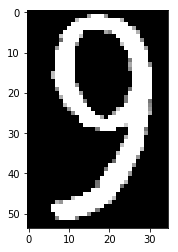

In [86]:
curimage=cropimage[1:55,180:215]
pl.imshow(curimage,cmap='gray')
curimage = skimage.transform.resize(curimage, (28,28), preserve_range=True)

classifier.predict(curimage.reshape(1,784))[0]

0.0

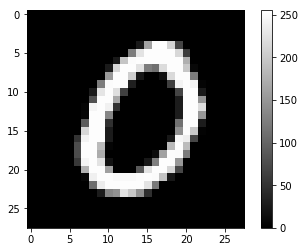

In [13]:
np.append(digits,curimage)
np.append(target,[0])
digits.shape
s=300
pl.imshow(digits[s].reshape(28,28),cmap='gray')
pl.colorbar()
classifier.predict(digits[s].reshape(1,784))[0]

In [47]:
zero=io.imread('C:/Users/bnaveen3/Desktop/zero.jpg')
zero.shape
from skimage.transform import rescale, resize, downscale_local_mean
zero = rescale(zero, 1/4)
zero.shape
zero[1,1]
#pl.imshow(zero)
#oimage.shape

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


array([1., 1., 1.])

In [10]:
closeflag='N'
i=1
m=0
print(y)
o,p=cimage.shape
print(cimage.shape)
while(closeflag !='Y' and i <4):
    print(closeflag)
    i =i+1
    print('m',m)
    for i in range(m,o-1):
        #print('i',i,'y',y)
        if i ==y-2:
            closeflag='Y'
        if sum(cimage[i]) > 0.9*y:
            rowid = i
        break
    for j in range(rowid,o-1):
        if sum(cimage[j]) < 0.9**y:
            rowidend = j
            m=rowidend+1
            print('rowidend',rowidend,'closeflag',closeflag)
        break
    cropimage=cimage[rowid-2:rowidend+2,]
    a,b = cropimage.shape
    #print('b',b)
    #print('value',sum(cropimage[:,200]),'x',x)
    pl.imshow(cropimage,cmap='gray')
    pl.colorbar()
    clength =rowidend-rowid
    #print('clength',clength)
    l=0
    curidx =-1
    q=0
    t=0
    final='naveen'
    endvalue=0
    exitflag ='N'
    while (exitflag != 'Y'):
        exitflag ='N'
        q=q+1
        #print('l',l)
        for i in range(l,b-1):
            if i == b-2:
                exitflag='Y'

            curidx = i
            #print('curidx',curidx)
            if sum(cropimage[:,i]) > clength*.85:
                cstart = i
                #print('cstart',cstart)
                break

        for i in range(cstart+1,b-1):
            if i == b-2:
                exitflag='Y'
            if sum(cropimage[:,i]) < clength*.85:
                cend = i
                #print('cend',cend)
                l=cend+1
                break
        if exitflag !='Y':
            curimage=cropimage[1:clength,cstart-1:cend+2]
            print('clength',clength,'cstart',cstart,'cend',cend)
            curimage = skimage.transform.resize(curimage, (28,28), preserve_range=True)
            pl.imshow(curimage)
            curimage = curimage.reshape(784,1)
            final = final+' '+str(round(classifier.predict(curimage.reshape(1,784))[0]))
    print(final)



225
(182, 225)
N
m 0


NameError: name 'rowidend' is not defined

o 182 p 225
c 0 p 225


IndexError: index 210 is out of bounds for axis 0 with size 182

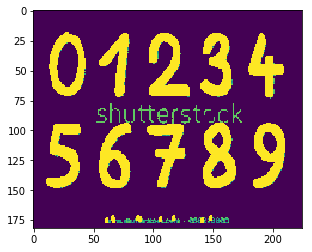

In [42]:
closeflag='N'
k=1
m=0
o,p=cimage.shape
pl.imshow(cimage)
print('o',o,'p',p)
while(closeflag !='Y' and k <4):
    k =k+1
    #print('m',m)
    for c in range(m,o-1):
        print('c',c,'p',p)
        if c ==o-2:
            closeflag='Y'
        if sum(cimage[i]) > 0.9*y:
            rowid = i
        break
    for j in range(rowid,o-1):
        if sum(cimage[j]) < 0.9**y:
            rowidend = j
            m=rowidend+1
            #print('rowidend',rowidend,'closeflag',closeflag)
        break
    print (i)
    cropimage=cimage[rowid-2:rowidend+2,]